In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read the data from /input/train.csv
data = pd.read_csv("train.csv")

In [4]:
X = data.drop(['Class', 'id'], axis=1)
y = data['Class']

# split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
list(X_train.columns)

['Mean_Integrated',
 'SD',
 'EK',
 'Skewness',
 'Mean_DMSNR_Curve',
 'SD_DMSNR_Curve',
 'EK_DMSNR_Curve',
 'Skewness_DMSNR_Curve']

<AxesSubplot:>

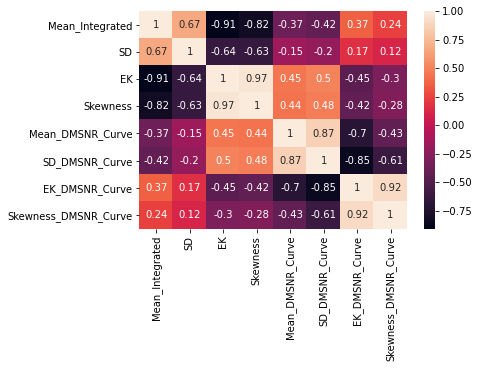

In [6]:
sns.heatmap(X.corr(), annot=True)

<Figure size 1152x1152 with 0 Axes>

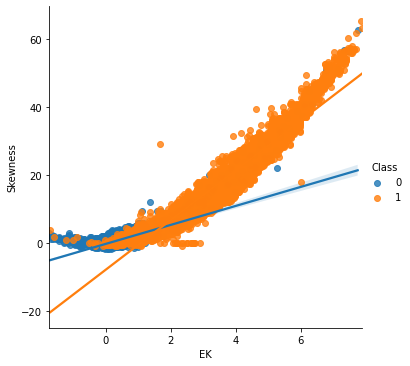

In [7]:
plt.figure(figsize=(16, 16))

sns.lmplot(x="EK", y="Skewness", data=data, hue='Class')

In [8]:
# plt.figure(figsize=(10, 10))

# sns.swarmplot(x=data["Class"], 
#               y=data["SD_DMSNR_Curve"])

<Figure size 1152x1152 with 0 Axes>

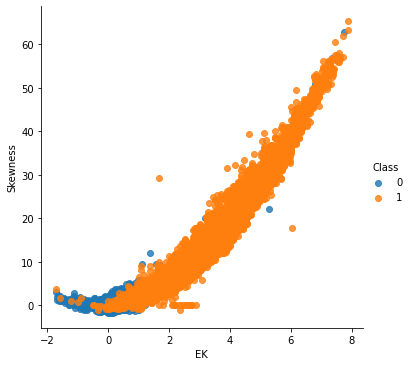

In [9]:
plt.figure(figsize=(16, 16))

sns.lmplot(x="EK", y="Skewness", data=data, hue='Class', fit_reg=False)

# Principal-Component Analysis

In [10]:
from sklearn.decomposition import PCA

In [11]:
#principal component analysis on X_train
pca = PCA(n_components=5)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)


In [12]:
model = xgb.XGBClassifier(max_depth=4, n_estimators=256, learning_rate=0.05)

model.fit(X_train_pca, y_train)

y_pred = model.predict_proba(X_val_pca)

print("Log loss: %f" % log_loss(y_val, y_pred))

Log loss: 0.040708


In [13]:
#finding the training loss
y_pred_train = model.predict_proba(X_train_pca)
print("Log loss: %f" % log_loss(y_train, y_pred_train))

Log loss: 0.036271


## Closer look into the data

In [14]:
  X.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
count,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000,117564.000000
mean,111.248300,46.713535,0.503498,1.886385,11.962921,26.190678,8.037488,93.881076
std,24.906474,6.102941,1.127093,6.515466,26.719946,20.041937,3.840980,79.962110
min,6.054688,24.783273,-1.730782,-1.791886,0.213211,7.370432,-2.597872,-1.976976
25%,104.546875,43.443390,0.049761,-0.188956,2.090301,14.955405,6.742911,49.409136
50%,116.664062,47.478932,0.186498,0.091720,2.808528,18.164924,8.442883,83.421375
75%,126.296875,50.862718,0.395620,0.691613,4.122910,24.732218,10.003237,122.093290
max,189.367188,93.602933,7.879628,65.385974,217.371238,109.890785,34.539844,1191.000837


In [15]:
y.value_counts()

0    106597
1     10967
Name: Class, dtype: int64

<AxesSubplot:xlabel='EK', ylabel='Count'>

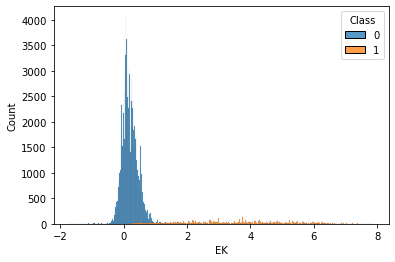

In [18]:
# investigating important data patterns with graphs

#sns.clustermap(data.corr(), annot=True)
sns.histplot(data, x="EK", hue="Class", multiple="stack")

In [27]:
# percentage of data points in Class 0 with EK > 1.5
print(len(data[(data['Class'] == 0) & (data['EK'] > 2)]) / len(data[data['Class'] == 0]))
# percentage of data points in Class 1 with EK > 1.5
print(len(data[(data['Class'] == 1) & (data['EK'] > 2)]) / len(data[data['Class'] == 1]))

0.0011538786269782453
0.8004012036108324


In [31]:
# likelihood of Class 0 with EK > 1.5
print(len(data[(data['Class'] == 0) & (data['EK'] > 3)]) / len(data[data['EK'] > 3]))

0.010952236081533314


<AxesSubplot:xlabel='EK', ylabel='Count'>

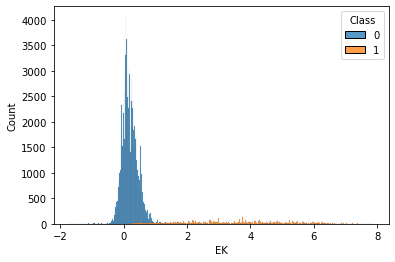

In [42]:
# generating a new useful feature from the existing data

data['EK_2'] = data['EK'] ** 2
data.head()



,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class,EK_2
0,0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0,0.001860
1,1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0,0.189633
2,2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0,0.144126
3,3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0,0.009700
4,4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0,0.011615


<AxesSubplot:xlabel='SD', ylabel='Density'>

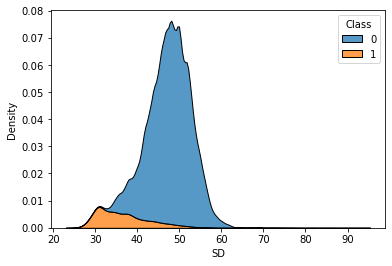

In [45]:
sns.kdeplot(data=data, x="SD", hue="Class", multiple="stack")

KeyboardInterrupt: 

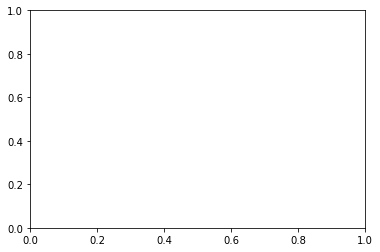

In [48]:
# plotting distributions of SD and EK together

sns.kdeplot(data=data, x="SD", y="EK", hue="Class")

In [ ]:
# what would be a useful feature to add to the data?

data['SD_2'] = data['SD'] ** 2